In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# EDA :
red_wine = pd.read_csv('winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0, 0.5, 'quality score')

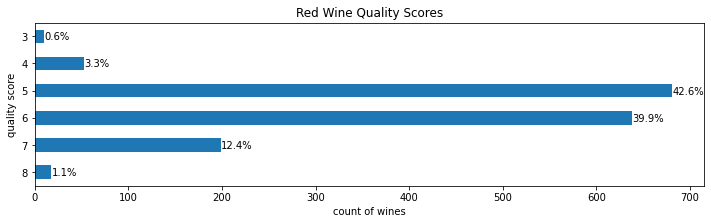

In [3]:
ax = red_wine.quality.value_counts().sort_index(
    ascending=False
).plot.barh(title='Red Wine Quality Scores', figsize=(12, 3))
for bar in ax.patches:
    ax.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/4, 
        f'{bar.get_width()/red_wine.shape[0]:.1%}'
    )
plt.xlabel('count of wines')
plt.ylabel('quality score')

In [4]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
red_wine['high_quality'] = pd.cut(red_wine.quality, bins=[0, 6, 10], labels=[0, 1])
red_wine.high_quality.value_counts(normalize=True)

high_quality
0    0.86429
1    0.13571
Name: proportion, dtype: float64

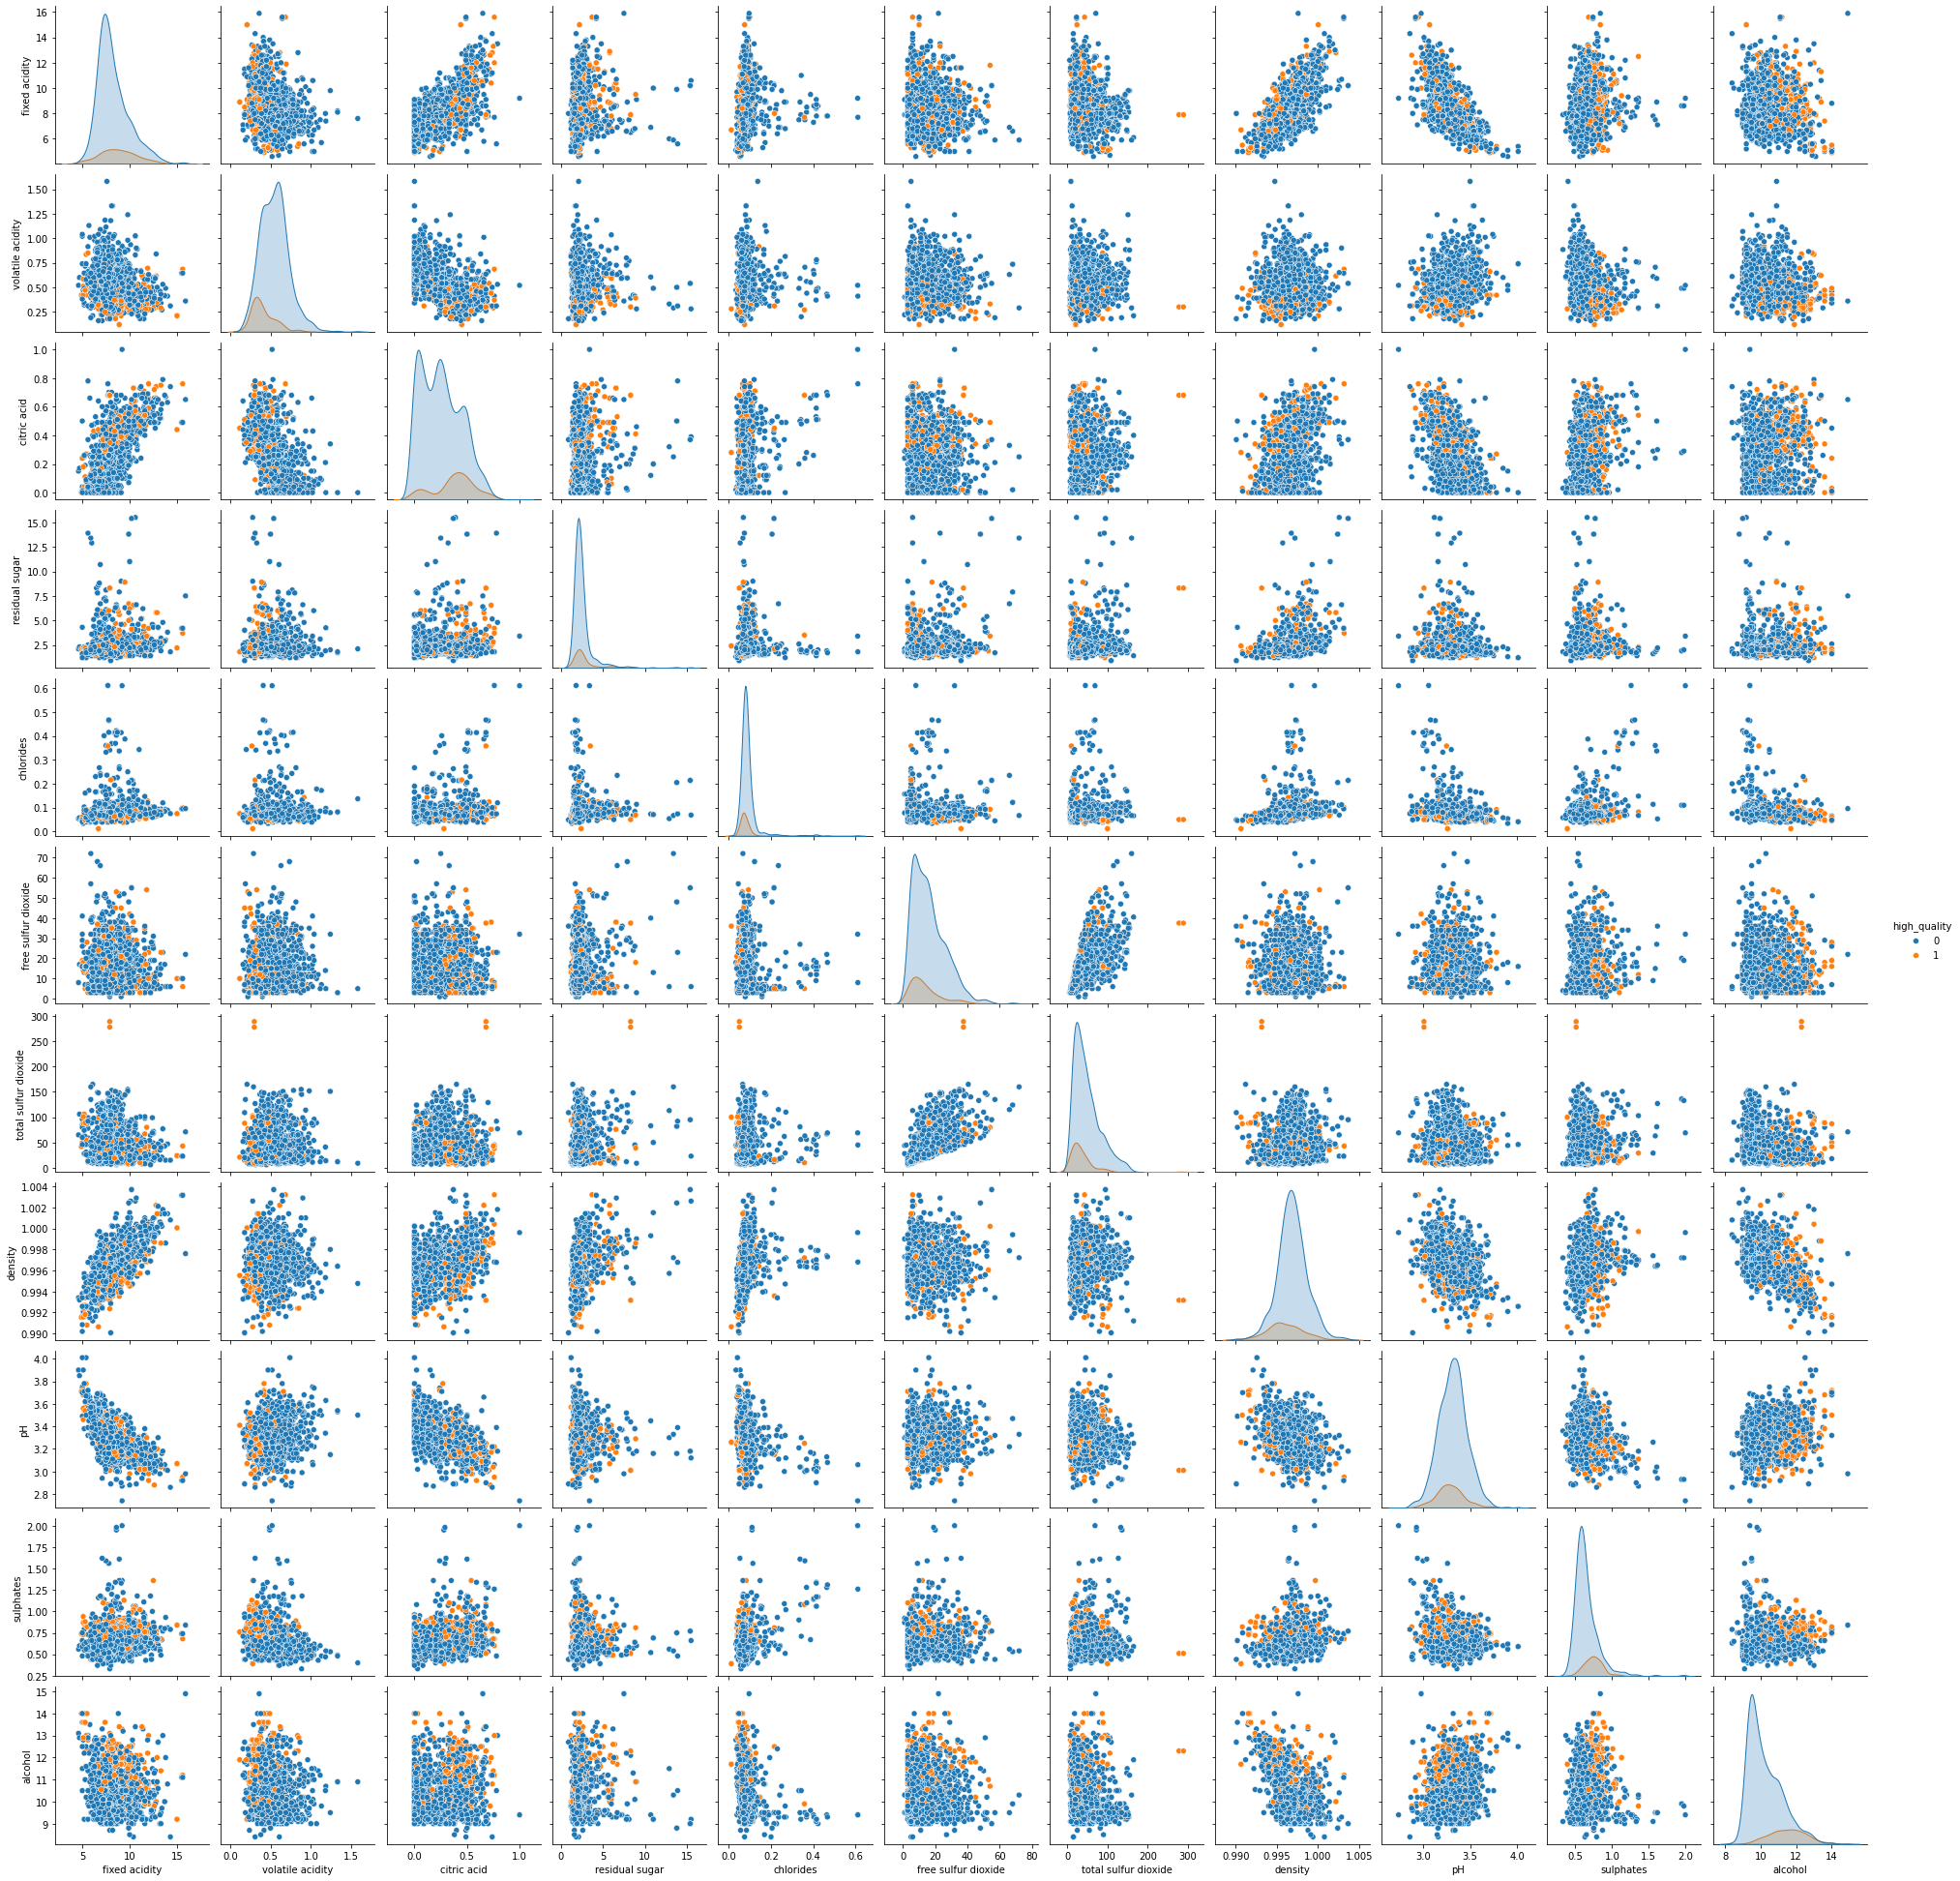

In [7]:
sns.pairplot(red_wine.drop(columns='quality'), hue='high_quality')

Text(0, 0.5, 'y')

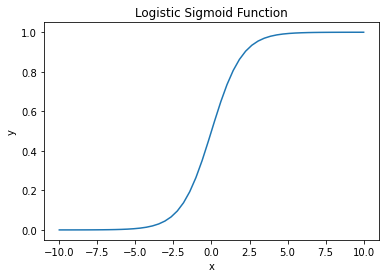

In [8]:
# Logistic Regression:
# The logistic sigmoid function gives values on [0, 1], which can be used as probabilities for classification problems:
x = np.linspace(-10, 10)
y = 1. / (1. + np.exp(-x))
plt.plot(x, y)
plt.title('Logistic Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')

Building a model
separate x and y data
get the training and testing sets
build a pipeline with preprocessing (standardizing here) ending in the model (logistic regression here)
fit the model
make predictions
evaluate the model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 1
red_y = red_wine.pop('high_quality')
red_X = red_wine.drop(columns='quality')

# 2
r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(
    red_X, red_y, test_size=0.1, random_state=0, stratify=red_y
)

Since we stratified on the high quality versus not from the entire dataset (from red_y), we preserve the ratio of high to not in both our test and training sets:

In [10]:
red_y.value_counts(normalize=True)

high_quality
0    0.86429
1    0.13571
Name: proportion, dtype: float64

In [11]:
r_y_train.value_counts(normalize=True)

high_quality
0    0.864489
1    0.135511
Name: proportion, dtype: float64

In [12]:
r_y_test.value_counts(normalize=True)

high_quality
0    0.8625
1    0.1375
Name: proportion, dtype: float64

In [13]:
# 3
red_quality_lr = Pipeline([
    ('scale', StandardScaler()), 
    ('lr', LogisticRegression(
        solver='lbfgs', class_weight='balanced', random_state=0
    ))
])

In [14]:
# 4
red_quality_lr.fit(r_X_train, r_y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [15]:
# 5
quality_preds = red_quality_lr.predict(r_X_test)

In [16]:
# mean accuracy
red_quality_lr.score(r_X_test, r_y_test)

0.775

In [17]:
# Zero-one loss is our error rate:
from sklearn.metrics import zero_one_loss
zero_one_loss(r_y_test, quality_preds)

0.22499999999999998

Text(0.5, 1.0, 'Portion of Confusion Matrix Considered')

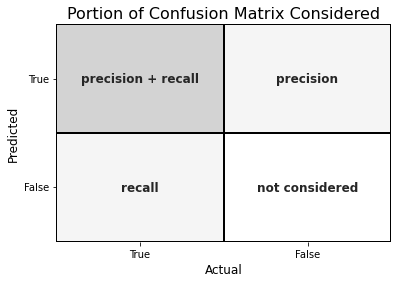

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

ax = sns.heatmap(
    np.array([[0.5, 1], [1, 0]]), cbar=False, cmap=ListedColormap(['white', 'lightgray', 'whitesmoke']),
    annot=np.array([
        ['precision + recall', 'precision'], 
        ['recall', 'not considered']
    ]), fmt='', annot_kws={'size': 12, 'weight': 'bold'}, linewidths=0.3, linecolor='black'
)
ax.set_xticklabels([True, False])
ax.set_xlabel('Actual', fontsize=12)
ax.set_yticklabels([True, False], rotation=0)
ax.set_ylabel('Predicted', fontsize=12)
ax.set_title('Portion of Confusion Matrix Considered', fontsize=16)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(r_y_test, quality_preds))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       138
           1       0.35      0.73      0.47        22

    accuracy                           0.78       160
   macro avg       0.65      0.75      0.66       160
weighted avg       0.86      0.78      0.80       160

